In [1]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##failed2 = []
##passed2 = []
#for x in all_tickers.index[100:200]:
   # try:
      #  data_frame2[x] = web.DataReader(x, data_source= "yahoo", start = "2019-1-1")["Adj Close"]
      #  passed2.append(x)
    #except (IOError, KeyError):
       # msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        #failed2.append(x)

In [13]:
sandp  = pd.read_csv('resources/sandpdata.csv')

In [15]:
len(sandp["Symbol"])

480

In [17]:
data = pd.DataFrame()

In [23]:
failed2 = []
passed2 = []
for x in sandp["Symbol"]:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2019-1-1")["Adj Close"]
        passed2.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed2.append(x)

In [25]:
failed2

['GGP', 'MON', 'SCG']

In [24]:
data.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,183.068054,42.443329,68.076973,82.120384,138.303879,46.655220,114.642334,224.570007,157.235001,18.830000,...,147.045517,100.250526,46.639339,19.286905,85.283569,66.076736,89.536743,101.280602,40.154263,83.823868
2019-01-03,176.174835,41.418125,64.864136,79.414642,133.581940,44.998528,110.881607,215.699997,162.143646,17.049999,...,143.960770,99.280663,46.455570,18.865334,82.072556,63.811588,87.284607,99.448669,39.932148,80.926529
2019-01-04,183.422806,43.077972,66.715439,81.973129,138.776093,46.794102,116.074997,226.190002,158.121140,19.000000,...,147.851089,103.284927,46.910160,19.593504,85.872749,66.503937,89.556320,102.845154,41.158604,84.101685
2019-01-07,183.000946,43.849316,67.714539,83.169548,139.258118,48.113506,117.806122,229.259995,160.441040,20.570000,...,148.941528,105.119019,46.707050,20.015074,88.141090,65.520378,89.458405,102.884758,41.322777,84.607712
2019-01-08,183.767899,44.923336,66.901543,83.556091,142.779892,49.571793,119.925255,232.679993,159.325897,20.750000,...,149.894470,108.412689,47.248684,20.676178,86.461929,66.136345,89.282150,100.577530,41.699402,85.867859


In [26]:
len(data.columns)

477

In [31]:
sandp.set_index("Symbol", inplace=True)

In [32]:
sandp.drop(failed2, inplace=True )

In [34]:
sandp.head()

,Name,Sector
Symbol,,
MMM,3M Company,Industrials
AOS,A.O. Smith Corp,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie Inc.,Health Care
ACN,Accenture plc,Information Technology


In [35]:
len(sandp.index)

477

## lets check for missing data

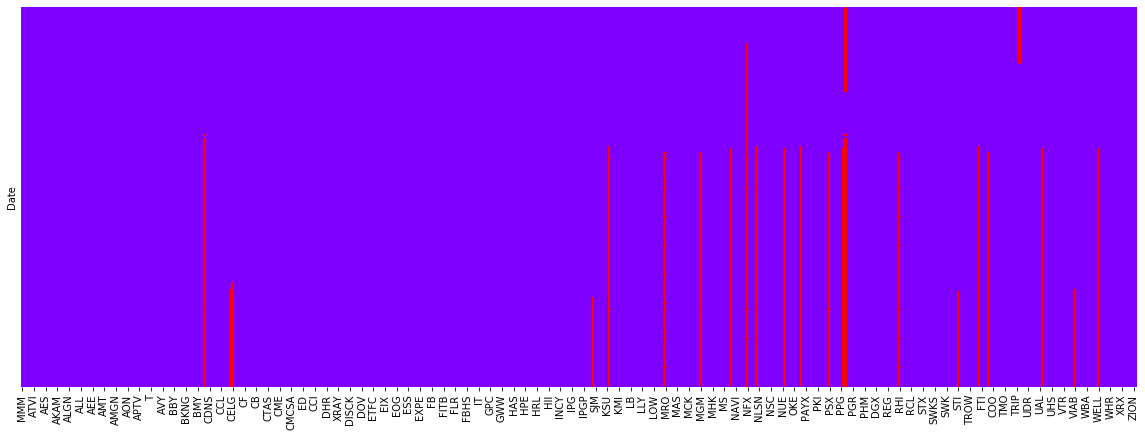

In [61]:
plt.figure(figsize=(20,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="rainbow")

In [66]:
data.dropna(axis=1, inplace=True)

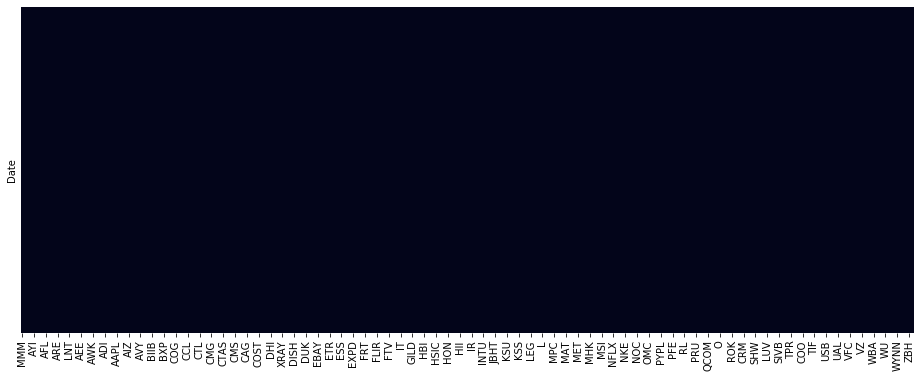

In [70]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315 entries, 2019-01-02 to 2020-04-01
Columns: 453 entries, MMM to ZTS
dtypes: float64(453)
memory usage: 1.1 MB


In [72]:
data.to_csv('resources/final_adj.csv')

In [73]:
sandp.to_csv("resources/final_sandp.csv")

In [74]:
returns_frame = pd.DataFrame()

In [78]:
for x in data:
    returns_frame[f"{x} daily returns"] = data[f"{x}"].pct_change()

In [82]:
len(returns_frame.columns)

453

In [83]:
len(data.columns)

453

In [84]:
returns_frame

,MMM daily returns,AOS daily returns,ABT daily returns,ABBV daily returns,ACN daily returns,ATVI daily returns,AYI daily returns,ADBE daily returns,AAP daily returns,AMD daily returns,...,WLTW daily returns,WYNN daily returns,XEL daily returns,XRX daily returns,XLNX daily returns,XYL daily returns,YUM daily returns,ZBH daily returns,ZION daily returns,ZTS daily returns
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.037654,-0.024155,-0.047194,-0.032948,-0.034142,-0.035509,-0.032804,-0.039498,0.031219,-0.094530,...,-0.020978,-0.009674,-0.003940,-0.021858,-0.037651,-0.034281,-0.025153,-0.018088,-0.005532,-0.034565
2019-01-04,0.041141,0.040075,0.028541,0.032217,0.038884,0.039903,0.046837,0.048632,-0.024808,0.114370,...,0.027023,0.040333,0.009785,0.038598,0.046303,0.042192,0.026027,0.034153,0.030713,0.039235
2019-01-07,-0.002300,0.017906,0.014976,0.014595,0.003473,0.028196,0.014914,0.013573,0.014672,0.082632,...,0.007375,0.017758,-0.004330,0.021516,0.026415,-0.014789,-0.001093,0.000385,0.003989,0.006017
2019-01-08,0.004191,0.024493,-0.012006,0.004648,0.025290,0.030309,0.017988,0.014918,-0.006950,0.008751,...,0.006398,0.031333,0.011596,0.033030,-0.019051,0.009401,-0.001970,-0.022425,0.009114,0.014894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26,0.035274,0.010572,0.071519,0.087174,0.128573,0.091734,0.055070,0.054787,0.074693,0.064306,...,0.010625,-0.047295,0.042484,0.056391,0.070115,0.064986,0.039522,0.044104,0.058801,0.089641
2020-03-27,-0.021589,-0.011534,-0.016489,-0.015712,-0.049375,-0.013167,-0.032929,-0.052190,-0.015651,-0.019368,...,0.010332,-0.114669,0.014851,-0.090628,-0.063029,-0.036906,-0.095314,-0.058602,0.007673,-0.052074
2020-03-30,0.033774,0.047490,0.064109,0.035365,0.042608,0.026510,0.035499,0.041069,0.009414,0.027480,...,0.038552,-0.034908,0.064489,0.016421,0.054906,0.011298,0.031227,0.035180,-0.002175,0.043930


## calculate mean daily returns for each security

In [89]:
mean_Daily_returns = []
for x in returns_frame:
    mean_Daily_returns.append(returns_frame[x].mean()  * 252)

In [91]:
len(mean_Daily_returns)

453

### Calulate the volitility for each security

In [108]:
security_vol = []
for x in returns_frame:
    security_vol.append(returns_frame[x].std() * np.sqrt(252))


In [110]:
len(security_vol)

453

### lets create a new frame withe secrity/vol/returns 

In [113]:
working_frame = pd.DataFrame(mean_Daily_returns, index=returns_frame.columns, columns=["mean daily returns"])

In [115]:
working_frame["volitility"] = security_vol

In [116]:
working_frame

,mean daily returns,volitility
MMM daily returns,-0.198645,0.335535
AOS daily returns,-0.092743,0.309375
ABT daily returns,0.145532,0.320543
ABBV daily returns,-0.031073,0.338164
ACN daily returns,0.139238,0.315839
...,...,...
XYL daily returns,-0.012782,0.367113
YUM daily returns,-0.167990,0.343062
ZBH daily returns,-0.031137,0.366782
ZION daily returns,-0.310157,0.342637


In [121]:
abbrv = [x.split()[0] for x in working_frame.index]

In [122]:
working_frame["ticker"] = abbrv

In [123]:
working_frame

,mean daily returns,volitility,ticker
MMM daily returns,-0.198645,0.335535,MMM
AOS daily returns,-0.092743,0.309375,AOS
ABT daily returns,0.145532,0.320543,ABT
ABBV daily returns,-0.031073,0.338164,ABBV
ACN daily returns,0.139238,0.315839,ACN
...,...,...,...
XYL daily returns,-0.012782,0.367113,XYL
YUM daily returns,-0.167990,0.343062,YUM
ZBH daily returns,-0.031137,0.366782,ZBH
ZION daily returns,-0.310157,0.342637,ZION


## We will need to being the sectors in to the new frame and align them with the proper ticker form the original sandp frame

In [128]:
ticker_and_sector_dict = dict(zip(sandp.index, sandp["Sector"]))

In [133]:
working_frame["sector"] = working_frame["ticker"].apply(lambda x: ticker_and_sector_dict[x])

In [134]:
working_frame

,mean daily returns,volitility,ticker,sector
MMM daily returns,-0.198645,0.335535,MMM,Industrials
AOS daily returns,-0.092743,0.309375,AOS,Industrials
ABT daily returns,0.145532,0.320543,ABT,Health Care
ABBV daily returns,-0.031073,0.338164,ABBV,Health Care
ACN daily returns,0.139238,0.315839,ACN,Information Technology
...,...,...,...,...
XYL daily returns,-0.012782,0.367113,XYL,Industrials
YUM daily returns,-0.167990,0.343062,YUM,Consumer Discretionary
ZBH daily returns,-0.031137,0.366782,ZBH,Health Care
ZION daily returns,-0.310157,0.342637,ZION,Financials


In [135]:
company_name_tickers = dict(zip(working_frame["ticker"], sandp["Name"]))

In [137]:
working_frame["name"] = working_frame["ticker"].apply(lambda x: company_name_tickers[x])

In [138]:
working_frame

,mean daily returns,volitility,ticker,sector,name
MMM daily returns,-0.198645,0.335535,MMM,Industrials,3M Company
AOS daily returns,-0.092743,0.309375,AOS,Industrials,A.O. Smith Corp
ABT daily returns,0.145532,0.320543,ABT,Health Care,Abbott Laboratories
ABBV daily returns,-0.031073,0.338164,ABBV,Health Care,AbbVie Inc.
ACN daily returns,0.139238,0.315839,ACN,Information Technology,Accenture plc
...,...,...,...,...,...
XYL daily returns,-0.012782,0.367113,XYL,Industrials,Verizon Communications
YUM daily returns,-0.167990,0.343062,YUM,Consumer Discretionary,Vertex Pharmaceuticals Inc
ZBH daily returns,-0.031137,0.366782,ZBH,Health Care,Viacom Inc.
ZION daily returns,-0.310157,0.342637,ZION,Financials,Visa Inc.


In [139]:
working_frame.to_csv("resources/working_Frame.csv")

In [164]:
working_frame.groupby("sector")["mean daily returns"].mean()

sector
Consumer Discretionary       -0.207410
Consumer Staples              0.095400
Energy                       -0.538171
Financials                   -0.110590
Health Care                   0.080675
Industrials                  -0.004958
Information Technology        0.119694
Materials                    -0.040339
Real Estate                  -0.072070
Telecommunication Services   -0.054321
Utilities                     0.065678
Name: mean daily returns, dtype: float64

In [171]:
df_bySector = pd.DataFrame(working_frame.groupby("sector")["mean daily returns"].mean())

In [174]:
df_bySector.head()

,mean daily returns
sector,
Consumer Discretionary,-0.207410
Consumer Staples,0.095400
Energy,-0.538171
Financials,-0.110590
Health Care,0.080675


In [177]:
df_bySector["number of companies"] = working_frame.groupby("sector")["name"].count()

In [178]:
df_bySector

,mean daily returns,number of companies
sector,,
Consumer Discretionary,-0.207410,74
Consumer Staples,0.095400,31
Energy,-0.538171,25
Financials,-0.110590,61
Health Care,0.080675,56
Industrials,-0.004958,64
Information Technology,0.119694,63
Materials,-0.040339,21
Real Estate,-0.072070,30


### Thre is low correlation to the number of companies and the mean deail returns for each sector

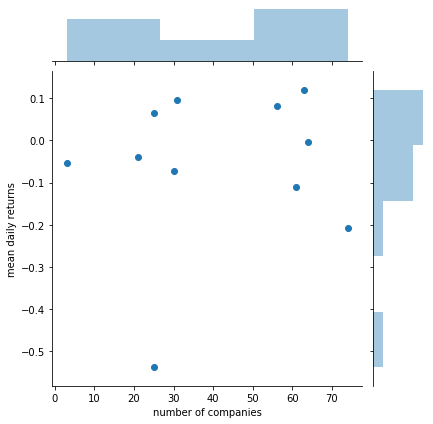

In [180]:
sns.jointplot(x = "number of companies", y = "mean daily returns", data=df_bySector)

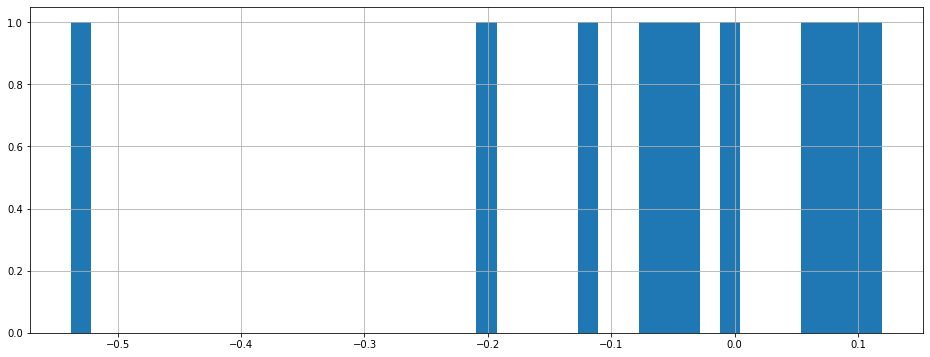

In [182]:
df_bySector["mean daily returns"].hist(figsize = (16,6), bins = 40)

In [184]:
working_frame.head()

,mean daily returns,volitility,ticker,sector,name
MMM daily returns,-0.198645,0.335535,MMM,Industrials,3M Company
AOS daily returns,-0.092743,0.309375,AOS,Industrials,A.O. Smith Corp
ABT daily returns,0.145532,0.320543,ABT,Health Care,Abbott Laboratories
ABBV daily returns,-0.031073,0.338164,ABBV,Health Care,AbbVie Inc.
ACN daily returns,0.139238,0.315839,ACN,Information Technology,Accenture plc


In [188]:
s_and_p_matrix = working_frame.pivot_table(index="name", columns= "sector", values="mean daily returns")

In [189]:
s_and_p_matrix

sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
name,,,,,,,,,,,
3M Company,NaN,NaN,NaN,NaN,NaN,-0.198645,NaN,NaN,NaN,NaN,NaN
A.O. Smith Corp,NaN,NaN,NaN,NaN,NaN,-0.092743,NaN,NaN,NaN,NaN,NaN
AES Corp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038153
AFLAC Inc,NaN,NaN,NaN,-0.167487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMETEK Inc.,NaN,NaN,NaN,NaN,NaN,0.108729,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Vertex Pharmaceuticals Inc,-0.16799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viacom Inc.,NaN,NaN,NaN,NaN,-0.031137,NaN,NaN,NaN,NaN,NaN,NaN
Visa Inc.,NaN,NaN,NaN,-0.310157,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
tech_and_returns = s_and_p_matrix["Industrials"]

In [200]:
tech_and_returns

name
3M Company                   -0.198645
A.O. Smith Corp              -0.092743
AES Corp                           NaN
AFLAC Inc                          NaN
AMETEK Inc.                   0.108729
                                ...   
Vertex Pharmaceuticals Inc         NaN
Viacom Inc.                        NaN
Visa Inc.                          NaN
Vornado Realty Trust               NaN
eBay Inc.                          NaN
Name: Industrials, Length: 453, dtype: float64

In [213]:
returns_frame.corr()

,MMM daily returns,AOS daily returns,ABT daily returns,ABBV daily returns,ACN daily returns,ATVI daily returns,AYI daily returns,ADBE daily returns,AAP daily returns,AMD daily returns,...,WLTW daily returns,WYNN daily returns,XEL daily returns,XRX daily returns,XLNX daily returns,XYL daily returns,YUM daily returns,ZBH daily returns,ZION daily returns,ZTS daily returns
MMM daily returns,1.000000,0.536062,0.642657,0.487524,0.630227,0.344436,0.560873,0.496626,0.448769,0.486080,...,0.493291,0.435528,0.434349,0.500760,0.645124,0.661817,0.499098,0.478361,0.589800,0.534786
AOS daily returns,0.536062,1.000000,0.512022,0.367246,0.478897,0.404137,0.453098,0.481039,0.422332,0.418971,...,0.411261,0.459658,0.404575,0.394326,0.483677,0.587335,0.293673,0.290379,0.536533,0.432180
ABT daily returns,0.642657,0.512022,1.000000,0.570033,0.743443,0.429820,0.540435,0.635157,0.477533,0.510915,...,0.645306,0.338697,0.710068,0.451989,0.501981,0.698934,0.564729,0.514542,0.579928,0.744782
ABBV daily returns,0.487524,0.367246,0.570033,1.000000,0.580837,0.391389,0.486976,0.547932,0.404373,0.435738,...,0.465434,0.390719,0.439576,0.430656,0.350180,0.539207,0.409196,0.441105,0.495781,0.547942
ACN daily returns,0.630227,0.478897,0.743443,0.580837,1.000000,0.511672,0.603174,0.753636,0.492531,0.565224,...,0.675284,0.484712,0.614419,0.601520,0.547239,0.727897,0.631093,0.631471,0.621123,0.712961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL daily returns,0.661817,0.587335,0.698934,0.539207,0.727897,0.411726,0.654413,0.667143,0.554030,0.510781,...,0.683767,0.532886,0.633152,0.630760,0.541951,1.000000,0.529283,0.487440,0.662008,0.656975
YUM daily returns,0.499098,0.293673,0.564729,0.409196,0.631093,0.185542,0.502491,0.394534,0.458793,0.358216,...,0.585965,0.471246,0.498995,0.555707,0.329253,0.529283,1.000000,0.684971,0.394246,0.656873
ZBH daily returns,0.478361,0.290379,0.514542,0.441105,0.631471,0.202544,0.518272,0.424647,0.374241,0.387510,...,0.564283,0.520013,0.322589,0.619604,0.309313,0.487440,0.684971,1.000000,0.467782,0.575779
ZION daily returns,0.589800,0.536533,0.579928,0.495781,0.621123,0.352426,0.551627,0.557871,0.475796,0.442036,...,0.530912,0.521293,0.425297,0.555407,0.515735,0.662008,0.394246,0.467782,1.000000,0.506190


## Correlations beow seems to be pretty good but some companies my be in the same sector as amazon which we are comparing to. So lets set up a frame an add the correlated companies to the fame as well as the sector. we will then look at companies that are not in the same sector as amazon

In [220]:
similar_to_amazon = returns_frame.corrwith(returns_frame["AMZN daily returns"]).sort_values(ascending =False)

In [223]:
corr_to_amazon = pd.DataFrame(similar_to_amazon, columns=["correlation"])

In [230]:
corr_to_amazon["ticker"] = [x.split()[0] for x in corr_to_amazon.index]

In [232]:
corr_to_amazon["sector"] = corr_to_amazon["ticker"].apply(lambda x: ticker_and_sector_dict[x])

## WE can se that maky of the correlation between the companies are in the same sector as amazon

In [234]:
corr_to_amazon.head(20)

,correlation,ticker,sector
AMZN daily returns,1.000000,AMZN,Consumer Discretionary
MSFT daily returns,0.746887,MSFT,Information Technology
ADBE daily returns,0.709438,ADBE,Information Technology
GOOGL daily returns,0.704058,GOOGL,Information Technology
GOOG daily returns,0.697468,GOOG,Information Technology
ANSS daily returns,0.675952,ANSS,Information Technology
CDNS daily returns,0.673295,CDNS,Information Technology
FB daily returns,0.667672,FB,Information Technology
AAPL daily returns,0.665350,AAPL,Information Technology
SNPS daily returns,0.659028,SNPS,Information Technology


## add company Names

In [235]:
corr_to_amazon["name"] = corr_to_amazon["ticker"].apply(lambda x: company_name_tickers[x])

In [238]:
corr_to_amazon.head(15)

,correlation,ticker,sector,name
AMZN daily returns,1.000000,AMZN,Consumer Discretionary,Amazon.com Inc.
MSFT daily returns,0.746887,MSFT,Information Technology,Medtronic plc
ADBE daily returns,0.709438,ADBE,Information Technology,Adobe Systems Inc
GOOGL daily returns,0.704058,GOOGL,Information Technology,Alphabet Inc Class A
GOOG daily returns,0.697468,GOOG,Information Technology,Alphabet Inc Class C
ANSS daily returns,0.675952,ANSS,Information Technology,ANSYS
CDNS daily returns,0.673295,CDNS,Information Technology,Cabot Oil & Gas
FB daily returns,0.667672,FB,Information Technology,Extra Space Storage
AAPL daily returns,0.665350,AAPL,Information Technology,Apple Inc.
SNPS daily returns,0.659028,SNPS,Information Technology,Sealed Air


### Lets check where the sector is not the same as amazon 'IT"

In [241]:
corr_to_amazon[corr_to_amazon["sector"] != "Information Technology"].head(20)

,correlation,ticker,sector,name
AMZN daily returns,1.000000,AMZN,Consumer Discretionary,Amazon.com Inc.
TROW daily returns,0.637370,TROW,Financials,Sherwin-Williams
AMP daily returns,0.607351,AMP,Financials,Ameriprise Financial
BLK daily returns,0.591863,BLK,Financials,BlackRock
COST daily returns,0.590979,COST,Consumer Staples,Consolidated Edison
FDX daily returns,0.588820,FDX,Industrials,"Facebook, Inc."
WRK daily returns,0.585357,WRK,Materials,United Technologies
L daily returns,0.584962,L,Financials,Lennar Corp.
CAT daily returns,0.578210,CAT,Industrials,Carnival Corp.
C daily returns,0.574525,C,Financials,Cincinnati Financial
